<h1 align="center">Hacettepe University<br>Department of Computer Science</h1> 
<h2 align="center">BBM 409 - Machine Learning Laboratory<br>2021 Fall</h2>
<h4 align="center">Assignment 3<br>Due on December 8, 2021</h4>

<table>
    <tr>
      <td><h4>Name Surname</h4></td>
      <td></td>
      <td><h4>Student ID</h4></td>
    </tr>
    <tr>
      <td><h4>Humeyra Uçar</h4></td>
      <td></td>
      <td><h4>21827957</h4></td>
    </tr>
    <tr>
      <td><h4>Murat Çelik</h4></td>
      <td></td>
      <td><h4>21827263</h4></td>
    </tr>
</table>

## 1. Introduction
&emsp;&emsp; In this assignment, we implemented a Naive Bayes classifier that tries to predict whether a mail is spam. Then we tested its performance on the Email Spam Dataset.
Naive Bayes is a simple learning algorithm that uses Bayes' rule with a strong assumption that the attributes are conditionally independent when given the class.




## 2. Background
### Conditional Probability and Bayes' Theorem
&emsp;&emsp; Conditional probability is defined as the probability of an outcome occurring depending on the occurrence of a previous outcome. The conditional probability is calculated by multiplying the probability of the previous event by the updated probability of the conditional event. <br>
&emsp;&emsp; The Bayes theorem defines the probability of an event based on prior knowledge of conditions that may be relevant to the event. If we know the conditional probability , we can use the bayes rule to find the reverse probabilities.
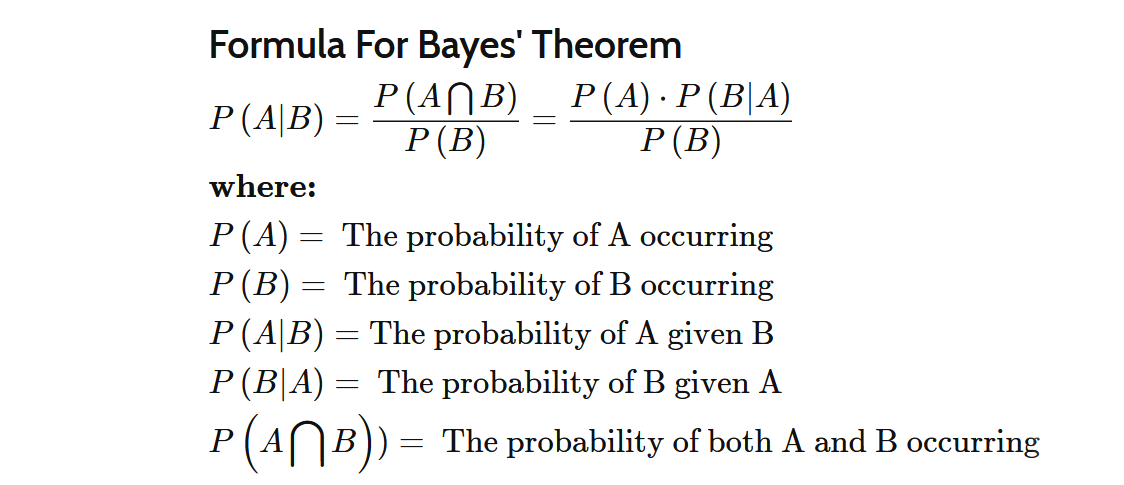 <br>

### Bag of Words (BoW)
&emsp;&emsp; Bag of Words is a model used for modeling text in Natural Language Processing. It is like a method of feature extraction with text data. A bag of words is a representation of text that defines the frequency of words in a document.  It is called a “bag” of words because it just keeps word counts and neglects grammatical details and word order.

### TF-IDF “Term Frequency — Inverse Document Frequency”
- Term Frequency measures the frequency of a word in a document. <br>
```tf(t,d) = count of t in d / number of words in d``` <br>
- Document Frequency measures the importance of documents in a whole set of the corpus. <br>
```df(t) = occurrence of t in N documents``` <br>

- Inverse Document Frequency is the inverse of document frequency, which measures the knowledge of the term t. <br>
```idf(t) = log(N/(df + 1))``` <br>

- Finally, the TF-IDF score is calculated as follows: <br>
```tf-idf(t, d) = tf(t, d) * log(N/(df + 1))``` <br>


## 3. Required Libraries

In [1]:
import pandas as pd
import numpy as np
import string
import time
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score,precision_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

## 4. Part I: Understanding the data
### 4.1 Pre-Information About Dataset
&emsp;&emsp; E-Mail Spam Dataset is a dataset provided to determine when a mail is spam or ham.
It includes the following features:
1. 'text': the text of the article, could be incomplete
2. 'spam': a label that marks the article as potentially spam(1) or ham(0) <br>
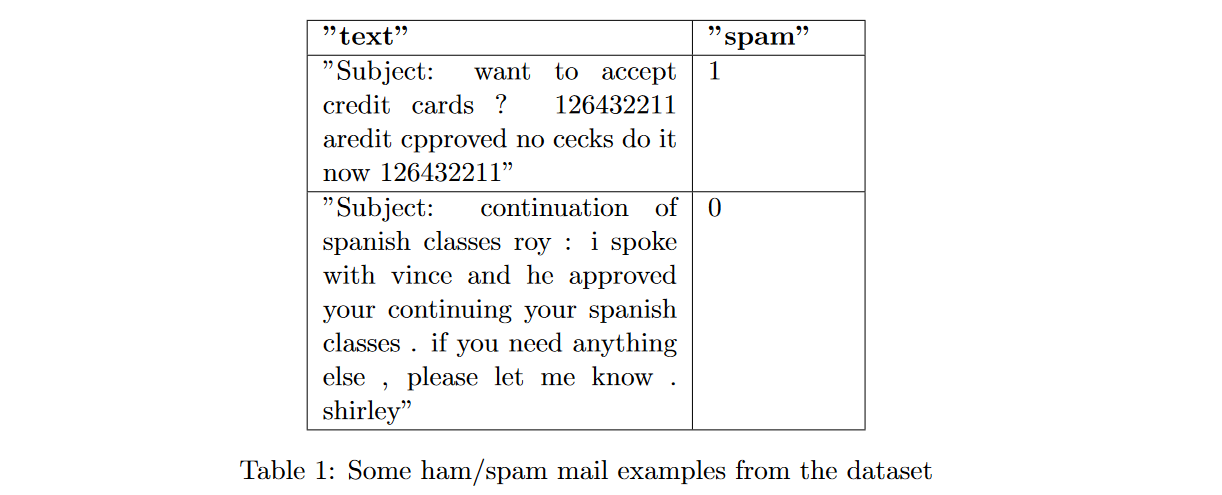

In [2]:
data = pd.read_csv('emails.csv')
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


### Preprocesssing

In [3]:
def is_int(v):
    try:     i = int(v)
    except:  return False
    return True

def prepare_text_df(data):
    data_text = data.text
    for i in data.index:
        text = data_text[i][7:]
        text = text.translate(str.maketrans('', '', string.punctuation)).lower() # without punctuation and lowercase
        text_list = list(filter(None, text.split())) # drop blank string
        text_list = [word for word in text_list if not is_int(word)] # drop numbers
        data.at[i, 'text'] = " ".join(text_list)       

In [4]:
# Get all the ham and spam emails
ham_msg = data[data.spam == 0]
spam_msg = data[data.spam == 1]

prepare_text_df(ham_msg)
prepare_text_df(spam_msg)

### 4.2 Spesific Keywords
&emsp;&emsp; We looked at the 3 most common used words in ham and spam messages and compared them.  We saw that the words 'business, company' were used in spam messages, and the words 'enron, ect, vince' were proportionally higher in ham messages. 

In [5]:
vectorizer = CountVectorizer(stop_words='english')

In [6]:
X_ham = vectorizer.fit_transform(ham_msg.text)
ham_words_count = np.sum(X_ham.toarray(), axis=0)
ham_words_total = ham_words_count.sum()
freq_of_ham_words = dict(zip(vectorizer.get_feature_names_out(), ham_words_count))
freq_of_ham_words = dict(sorted(freq_of_ham_words.items(), key=lambda item: item[1], reverse=True))

In [7]:
X_spam = vectorizer.fit_transform(spam_msg.text)
spam_words_count = np.sum(X_spam.toarray(), axis=0)
spam_words_total = spam_words_count.sum()
freq_of_spam_words = dict(zip(vectorizer.get_feature_names_out(), spam_words_count))
freq_of_spam_words = dict(sorted(freq_of_spam_words.items(), key=lambda item: item[1], reverse=True))

In [8]:
print("The 3 most common words in ham messages:")
for i in list(freq_of_ham_words)[0:3]:
    if i in freq_of_spam_words:
        print(f"{i} occurance {freq_of_ham_words[i]} times in ham messages, {freq_of_spam_words[i]} times in spam messages.")
    else:
        print(f"{i} occurance {freq_of_ham_words[i]} times in ham messages, 0 times in spam messages.")

The 3 most common words in ham messages:
enron occurance 13382 times in ham messages, 0 times in spam messages.
ect occurance 11417 times in ham messages, 1 times in spam messages.
vince occurance 8531 times in ham messages, 1 times in spam messages.


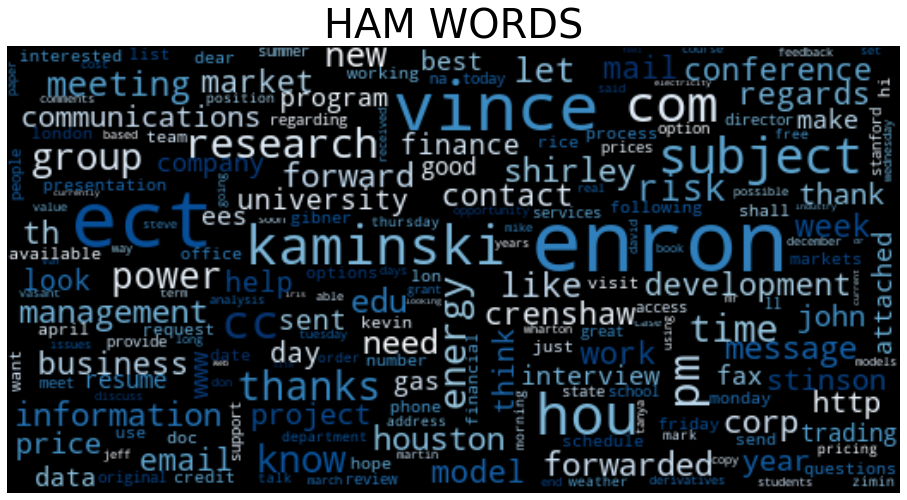

In [9]:
wordcloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').fit_words(freq_of_ham_words)
plt.figure(figsize=(16,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(label="HAM WORDS",
          fontsize=40,
          color="black")
plt.show()

In [10]:
print("The 3 most common words in spam messages:")
for i in list(freq_of_spam_words)[0:3]:
    if i in freq_of_ham_words:
        print(f"{i} occurance {freq_of_spam_words[i]} times in spam messages, {freq_of_ham_words[i]} times in ham messages.")
    else:
        print(f"{i} occurance {freq_of_spam_words[i]} times in spam messages, 0 times in ham messages.")

The 3 most common words in spam messages:
com occurance 998 times in spam messages, 4444 times in ham messages.
business occurance 844 times in spam messages, 1205 times in ham messages.
company occurance 805 times in spam messages, 877 times in ham messages.


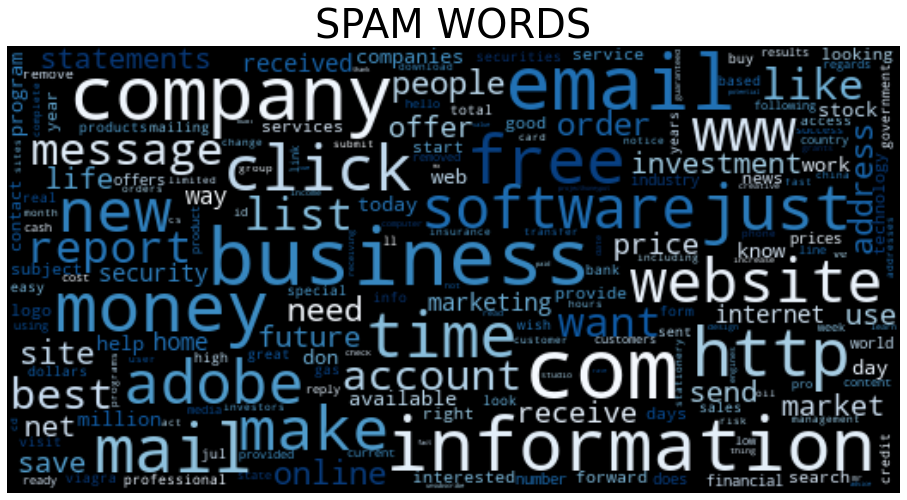

In [11]:
wordcloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').fit_words(freq_of_spam_words)
plt.figure(figsize=(16,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(label="SPAM WORDS",
          fontsize=40,
          color="black")
plt.show()

## 5. Part II: Implementing Naive Bayes

In [52]:
class NaiveBayesClassifier:
    """
    Parameters:
        alpha           : the smoothing parameter
        is_tfidf        : if our matrix is to be transformed to a normalized tf-idf representation, should be set True 
        
    Attributes:
        alpha           : the smoothing parameter 
        is_tfidf        : checks that our matrix has been transformed to a normalized tf-idf representation 
        prob_spam_words : keeps the probability of words in spam data 
        prob_ham_words  : keeps the probability of words in ham data 
        prob_spam       : probability of spam data 
        prob_ham        : probability of ham data
        words           : list of all words in data
    """
    alpha = None
    is_tfidf = None
    prob_spam_words = None
    prob_ham_words = None
    prob_spam = None
    prob_ham = None
    words = None
    
    def __init__(self, alpha=1, is_tfidf=False):
        self.alpha = alpha
        self.is_tfidf = is_tfidf
        
    def fit(self, X_train,y_train):
        self.words = X_train["words"]                            # list of all words in data 
        num_of_distinct_words = len(self.words)                  # number of all words
        matrix_vectorizer_X_train = X_train["vectorizer"]        # vectorizer matrix
        
        self.prob_spam = y_train.value_counts(normalize=True)[0] # calculate probability of spam 
        self.prob_ham = y_train.value_counts(normalize=True)[1]  # calculate probability of spam
        
        
        idx_ham = y_train[y_train == 0].index
        idx_spam = y_train[y_train == 1].index
            
        num_of_words_spam_msg = np.sum(matrix_vectorizer_X_train.iloc[idx_spam],axis=1).sum() # total number of words in spam data 
        num_of_words_ham_msg = np.sum(matrix_vectorizer_X_train.iloc[idx_ham],axis=1).sum()   # total number of words in ham data 
        
        spam_msg_df = matrix_vectorizer_X_train.iloc[idx_spam]
        ham_msg_df = matrix_vectorizer_X_train.iloc[idx_ham]
        
        # dictionary where we save word probabilities 
        self.prob_spam_words = {word:0 for word in self.words}
        self.prob_ham_words = {word:0 for word in self.words}
    
        # a different method is used if our data is transformed with tf-idf 
        if self.is_tfidf:          
            weight_words_X_train = X_train["tf_idf_dict"]
            for word in self.words:
                num_of_word_given_spam = spam_msg_df[word].sum() 
                prob_word_given_spam = (num_of_word_given_spam + self.alpha) / (num_of_words_spam_msg + self.alpha*num_of_distinct_words)
                self.prob_spam_words[word] = prob_word_given_spam * weight_words_X_train[word]

                num_of_word_given_ham = ham_msg_df[word].sum() 
                prob_word_given_ham = (num_of_word_given_ham + self.alpha) / (num_of_words_ham_msg + self.alpha*num_of_distinct_words)
                self.prob_ham_words[word] = prob_word_given_ham * weight_words_X_train[word] # multiply by the weight of the word to change its importance 
            
        else:
            for word in self.words:
                num_of_word_given_spam = spam_msg_df[word].sum() 
                prob_word_given_spam = (num_of_word_given_spam + self.alpha) / (num_of_words_spam_msg + self.alpha*num_of_distinct_words)
                self.prob_spam_words[word] = prob_word_given_spam

                num_of_word_given_ham = ham_msg_df[word].sum() 
                prob_word_given_ham = (num_of_word_given_ham + self.alpha) / (num_of_words_ham_msg + self.alpha*num_of_distinct_words)
                self.prob_ham_words[word] = prob_word_given_ham        

    def predict(self,X_test):        
        y_pred = list()        
        # we find the probability of the sentence being spam and ham
        for index in range(len(X_test)):
            p_spam_given_message = np.log(self.prob_spam)
            p_ham_given_message = np.log(self.prob_ham)
            
            list_of_instance_sentence = X_test.iloc[index].split(' ')
            for word in list_of_instance_sentence:
                if word in self.prob_spam_words:
                    p_spam_given_message += np.log(self.prob_spam_words[word])
                if word in self.prob_ham_words: 
                    p_ham_given_message += np.log(self.prob_ham_words[word])
            
            # we identify the label based on the highest probability 
            if p_ham_given_message > p_spam_given_message:
                y_pred.append(0)
            elif p_ham_given_message <= p_spam_given_message:
                y_pred.append(1)

        return y_pred
    
        

## 5.1 Test Model
### 5.1.1 Load data

In [44]:
data = pd.read_csv('emails.csv')

### 5.1.2 Preprocessing for  BoW

In [45]:
prepare_text_df(data)  # edit string values in data 
X_train, X_test, y_train, y_test = train_test_split(data.text, data.spam, test_size=0.2, random_state=31) #0.80 train/ 0.20 test data
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [46]:
def prepare_X_train(X_train, ngram_range = (1,1),stop_words = None):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words=stop_words) # obtain BoW model (two option : bigram(2,2), unigram(1,1))
    matrix_vectorize = vectorizer.fit_transform(X_train)
    words_X_train = list(vectorizer.get_feature_names_out()) # all words
    matrix_vectorizer_X_train = pd.DataFrame(matrix_vectorize.toarray(), columns = list(words_X_train))
    X_train = {"words": words_X_train, "vectorizer" :matrix_vectorizer_X_train }
    return X_train

&emsp;&emsp; We wanted to use 4 different preprocessed data in our model. These are unigram or bigram, with and without a stopword. For the reason to be explained below, we evaluated our model as bigram data with stop words and bigram model without stop words. 

In [47]:
X_train_unigram_with_stop_words = prepare_X_train(X_train,(1,1))
X_train_unigram_non_stop_words = prepare_X_train(X_train,(1,1), "english")
#X_train_bigram_with_stop_words = prepare_X_train(X_train,(2,2))
#X_train_bigram_non_stop_words = prepare_X_train(X_train,(2,2),"english")

### 5.1.3 Get Result From Model

In [48]:
df_result = pd.DataFrame(columns=["f1_score", "recall_score", "precision_score", "accuracy_score"])

In [49]:
def train_predict_model(df, model, X_train, y_train, X_test,name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = {"f1_score":f1_score(y_test, y_pred) ,"recall_score":recall_score(y_test, y_pred),
              "precision_score":precision_score(y_test, y_pred),"accuracy_score": accuracy_score(y_test, y_pred)}
    df.loc[name] = result

&emsp;&emsp; Looking at the results, we observe that the model we created is suitable and successful for the spam filtering problem. Although we cannot clearly observe the difference between the models with and without a stopword due to the high score, we can say that the bigram model without a stopword gives the best results. 

In [50]:
model = NaiveBayesClassifier()
train_predict_model(df_result, model, X_train_unigram_with_stop_words, y_train, X_test, "unigram with stop words")
train_predict_model(df_result, model, X_train_unigram_non_stop_words, y_train, X_test, "unigram non-stop words")
#train_predict_model(df_result, model, X_train_bigram_with_stop_words, y_train, X_test, "bigram with stop words")
#train_predict_model(df_result, model, X_train_bigram_non_stop_words, y_train, X_test, "bigram non-stop words")
df_result

,f1_score,recall_score,precision_score,accuracy_score
unigram with stop words,0.983051,0.992395,0.973881,0.992147
unigram non-stop words,0.983114,0.996198,0.970370,0.992147


### 5.1.4 Bag of Words (BoW) Model Choices
&emsp;&emsp; We have 3 different options in our project where we use the Bag of Words (BoW) model. These are bigrams, unigrams and both of them. We determined our preference as unigram. The main reason for this is memory efficiency. The bigram method, which saves the neighboring pair in each sentence, is a very inefficient option with memory problems. We think that a large matrix of this size will negatively affect the model performance. We state that the main reason for the codes we left as a comment line above is that it gives a memory error. Our preference was unigram. 

### 5.1.5 TIME (optional)
&emsp;&emsp;  Our model recognizes all the words in the data with the fit method and generates a probability value for each of them. We make predictions by using the ready probabilities of the words in the test data coming with the Predict method. With this structure, we can call our Naive Bayes Classifier model an Eager Learning example. 

In [51]:
before_fit = time.time()
model.fit(X_train_unigram_non_stop_words, y_train)
after_fit = time.time()
y_pred = model.predict(X_test)
after_predict = time.time()

print(f'Model fit time is {format(after_fit-before_fit,".3f")} seconds. Model predict time is {format(after_predict - after_fit,".3f")} seconds.')

Model fit time is 7.494 seconds. Model predict time is 0.519 seconds.


## 6. Part III: Examine The Solution Structure 

### 6.1 Analyzing Effect of The Words On Prediction

In [53]:
def get_frequency_data(x, stop_value=None):
    vectorizer = CountVectorizer(ngram_range=(1,1), stop_words=stop_value)
    matrix_vectorize_ham = vectorizer.fit_transform(x)
    words_ham = list(vectorizer.get_feature_names_out())
    tf_idf = TfidfTransformer()
    words_ham_tdf = tf_idf.fit(matrix_vectorize_ham).idf_
    frequency = dict(zip(words_ham, words_ham_tdf))
    frequency = dict(sorted(frequency.items(), key=lambda item: item[1]))
    return frequency  # frequency based calculation with TF-IDF

In [54]:
ham_frequency = get_frequency_data(data[data.spam==0].text)
spam_frequency = get_frequency_data(data[data.spam==1].text)

In [55]:
presence_ham = {k: ham_frequency[k] for k in list(ham_frequency)[:10]}
absence_ham = {k: ham_frequency[k] for k in list(ham_frequency)[-10:]}
presence_spam  = {k: spam_frequency[k] for k in list(spam_frequency)[:10]}
absence_spam = {k: spam_frequency[k] for k in list(spam_frequency)[-10:]}

• List the 10 words whose presence most strongly predicts that the mail is ham

In [56]:
list(presence_ham.keys())

['to', 'the', 'and', 'for', 'you', 'of', 'on', 'in', 'is', 'have']

• List the 10 words whose absence most strongly predicts that the mail is ham

In [57]:
list(absence_ham.keys())

['zones',
 'zorganizowalem',
 'zosta',
 'zostal',
 'zou',
 'zrobilem',
 'zucha',
 'zwlaszcza',
 'zyc',
 'zzmacmac']

• List the 10 words whose presence most strongly predicts that the mail is spam.

In [26]:
list(presence_spam.keys())

['to', 'the', 'and', 'you', 'of', 'your', 'for', 'is', 'in', 'this']

• List the 10 words whose absence most strongly predicts that the mail is spam.

In [27]:
list(absence_spam.keys())

['zuma',
 'zunf',
 'zungenakrobatik',
 'zustellstatus',
 'zuyw',
 'zwischen',
 'zwzm',
 'zxghlajf',
 'zyban',
 'zzn']

### 6.2 10 Non-Stopwords That Most Strongly Predict

In [28]:
ham_frequency = get_frequency_data(data[data.spam==0].text, "english")
spam_frequency = get_frequency_data(data[data.spam==1].text, "english")

In [29]:
presence_ham = {k: ham_frequency[k] for k in list(ham_frequency)[:10]}
absence_ham  = {k: ham_frequency[k] for k in list(ham_frequency)[-10:]}
presence_spam = {k: spam_frequency[k] for k in list(spam_frequency)[:10]}
absence_spam = {k: spam_frequency[k] for k in list(spam_frequency)[-10:]}

* 10 non-stopwords that most strongly predict that the mail is ham.

In [30]:
list(presence_ham.keys())

['vince',
 'enron',
 'subject',
 'cc',
 'kaminski',
 'thanks',
 'pm',
 'ect',
 'know',
 'com']

* 10 non-stopwords that most strongly predict that the mail is spam.

In [31]:
list(presence_spam.keys())

['com',
 'http',
 'just',
 'information',
 'click',
 'business',
 'time',
 'email',
 'best',
 'new']

&emsp;&emsp; The fact that the 3 keywords we chose in part 1 are in the words listed above shows us that we are on the right way.

### 6.3 10 Non-Stopwords That Most Strongly Predict

In [32]:
prepare_text_df(data)
X_train, X_test, y_train, y_test = train_test_split(data.text,data.spam, test_size=0.7, random_state=31)
X_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)

In [33]:
def transform_X_train(X_train, stop_value = None):
    vectorizer = CountVectorizer(ngram_range=(1,1),stop_words=stop_value)
    tf_idf = TfidfTransformer(smooth_idf=False)

    X = vectorizer.fit(X_train)
    words_X_train = list(vectorizer.get_feature_names_out())
    X_transform = X.transform(X_train)

    tfidf_transformer = TfidfTransformer().fit(X_transform)
    weight_words_X_train = tfidf_transformer.idf_
    X_tfidf = tfidf_transformer.transform(X_transform)

    matrix_vectorizer_X_train = pd.DataFrame(X_tfidf.todense(),columns = list(words_X_train))
    X_train = {"words": words_X_train, "vectorizer" :matrix_vectorizer_X_train, "tf_idf_dict" : dict(zip(words_X_train,weight_words_X_train)) }
    return X_train

In [34]:
X_train_with_stop_words = transform_X_train(X_train)
X_train_non_stop_words = transform_X_train(X_train,"english")

In [35]:
model = NaiveBayesClassifier(is_tfidf=True)
train_predict_model(df_result, model, X_train_with_stop_words, y_train, X_test, "unigram with stop words - TF-IDF")
train_predict_model(df_result, model, X_train_non_stop_words, y_train, X_test, "unigram non-stop words - TF-IDF")

In [36]:
df_result

,f1_score,recall_score,precision_score,accuracy_score
unigram with stop words,0.983051,0.992395,0.973881,0.992147
unigram non-stop words,0.983114,0.996198,0.970370,0.992147
unigram with stop words - TF-IDF,0.414082,0.261930,0.988000,0.825686
unigram non-stop words - TF-IDF,0.801522,0.670201,0.996845,0.921945


### 6.4 Analyzing Effect of The Stopwords
&emsp;&emsp; Some common words like a, to, and others are called stopwords and they can't help to find true meaning of sentence. These are words that can be removed without any negative outcome to the final model. Often reducing the dataset size by removing these words helps improve performance. <br>
&emsp;&emsp;  In classification problems like our problem, stop words are not neccessary, we can remove these. When we use TF-IDF, removing the stop words is more effective than not using TF-IDF. Both Accuracy and F1 Score increase in the non-stopword model.


## References
- Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems by Aurélien Géron
- [towardsdatascience](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761)
- [Stanford CS229: Machine Learning](https://www.youtube.com/watch?v=jGwO_UgTS7I&list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU)
- [Naive Bayes Text Categorization Algorithm Based on TF-IDF Attribute Weighting](https://dl.acm.org/doi/pdf/10.1145/3297156.3297256?casa_token=MFA3RJgxDKkAAAAA:pUBSjBVoS011mnkpZCURJSsO28nRhKf52rihuI8LUKiRDUJHiGj9EgUL5A-jX5gPEA_zIQo70c4)